# Project 2: `MNIST` Handwritten recognition

We would like to let the machine recognize handwritten digits. `MNIST` is a classical dataset that contains handwritten digits information. Now we apply kNN algrotithm to it.

## Dataset description
Every dataset is stored as a $28\times28$ picture. We will transform them into a $28\times28$ matrix. Every entry represents a gray value of the corresponding pixel, whose value is from 0 to 255. The label of each matrix is the digit it represents.



In [1]:
import tensorflow as tf
# import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance',
                             metric='euclidean', algorithm='brute')
x_train.shape

(60000, 28, 28)

In [3]:
X_train_norm = tf.reshape(x_train, (x_train.shape[0], 28*28))
X_test_norm = tf.reshape(x_test, (x_test.shape[0], 28*28))

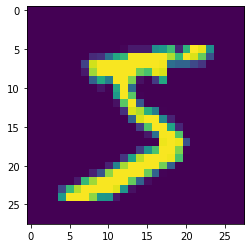

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
a = X_train_norm[0]
b = tf.reshape(a, (28, 28))

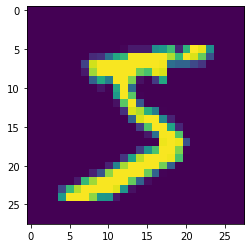

In [6]:
plt.imshow(b)

In [7]:
neigh.fit(X_train_norm, y_train)
r2 = neigh.predict(X_test_norm)

In [8]:
r2

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
r2-y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

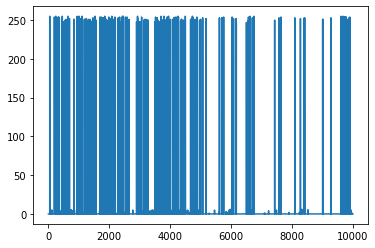

In [10]:
plt.plot(r2-y_test)

In [11]:
max(r2)

9

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
rr = 0
for i in range(len(r2)):
    if r2[i] == y_test[i]:
        rr = rr + 1
pp = rr/len(r2)

In [14]:
from knn import classify_kNN, dataSplit, classify_kNN_test, encodeNorm, decodeNorm
import numpy as np
classify_kNN_test(np.array(X_test_norm), y_test, np.array(X_train_norm), y_train, k=10)

KeyboardInterrupt: 

In [12]:
y_t = classify_kNN(X_test_norm, X_train_norm, y_test, k=10)

MemoryError: Unable to allocate 438. GiB for an array with shape (60000, 7840000) and data type uint8